# Hw 2 question 2

supposedly it took Andrew and Yianni 3 days to write the louvain clustering algo. The inner loop is about 100 lines.

Given we only get 10 pts for the implementation and we are running out of time lets use the scanpy version for now

- ref
    * [scanpy.tl.umap](https://icb-scanpy.readthedocs-hosted.com/en/stable/api/scanpy.tl.umap.html)
    * [scanpy.api.pp.neighbors](https://icb-scanpy.readthedocs-hosted.com/en/stable/api/scanpy.api.pp.neighbors.html?highlight=neighbors)
    * [scanpy.pl.umap](https://icb-scanpy.readthedocs-hosted.com/en/stable/api/scanpy.pl.umap.html#scanpy.pl.umap)
    * [anndata](https://anndata.readthedocs.io/en/latest/anndata.AnnData.html)
        + "uns" stands for unstructured data
        + "obs" are panda data frame observations 
        + "obsm key-indexed multi-dimensional observations

In [1]:
import numpy
import pandas as pd
import scanpy
print("scanpy.__version__:{}".format(scanpy.__version__))

import scanpy.api as api

scanpy.__version__:1.4.1


## Load the data and explore the anndata

In [2]:
anndata = api.read("PBMC.merged.h5ad")

In [3]:
anndata.uns.keys()

odict_keys(['Cell type_colors', 'Method_colors', 'Sample_colors', 'anno_colors', 'louvain', 'louvain_colors', 'neighbors', 'rank_genes_groups'])

In [4]:
anndata.uns['neighbors']

{'connectivities': <15476x15476 sparse matrix of type '<class 'numpy.float64'>'
 	with 350180 stored elements in Compressed Sparse Row format>,
 'distances': <15476x15476 sparse matrix of type '<class 'numpy.float64'>'
 	with 216679 stored elements in Compressed Sparse Row format>,
 'params': {'method': 'umap', 'n_neighbors': 15}}

In [5]:
anndata.obs.keys()

Index(['Sample', 'n_counts', 'n_genes', 'batch', 'louvain', 'anno', 'Method',
       'Cell type'],
      dtype='object')

In [6]:
anndata.obsm.keys()

('X_pca', 'X_umap', 'X_tsne')

In [7]:
print("anndata.obsm['X_umap'].shape:{}".format(anndata.obsm['X_umap'].shape))
anndata.obsm['X_umap']

anndata.obsm['X_umap'].shape:(15476, 2)


array([[  5.22802598, -12.95435605],
       [  6.55507112,  11.33216615],
       [  2.77255624,   9.3685141 ],
       ...,
       [  7.9267579 ,  -6.59574586],
       [-14.63327089,   5.05999486],
       [  1.79479544,  -2.50853541]])

## reverse engine scanpy neighbors
calling neighbors updates anndata.uns['neighbors']

In [8]:
%%time
import scanpy.api.pp as pp
neighborsAnndata = pp.neighbors(anndata, n_neighbors=12, 
                                           n_pcs=50,
                                           copy=True)

CPU times: user 11.5 s, sys: 456 ms, total: 12 s
Wall time: 7.72 s


In [9]:
neighborsAnndata.uns['neighbors']

{'params': {'n_neighbors': 12, 'method': 'umap'},
 'distances': <15476x15476 sparse matrix of type '<class 'numpy.float64'>'
 	with 170304 stored elements in Compressed Sparse Row format>,
 'connectivities': <15476x15476 sparse matrix of type '<class 'numpy.float64'>'
 	with 276558 stored elements in Compressed Sparse Row format>}

## reverse engineer scanpy umap
changes X_umap in adata.obsm. Shape is still the same

In [10]:
%%time
#import scanpy.tl as tl
import scanpy.api.tl as tl
umapAnndata = tl.umap(neighborsAnndata, copy=True)

CPU times: user 13.8 s, sys: 382 ms, total: 14.2 s
Wall time: 10.7 s


In [11]:
print("umapAnndata.obsm['X_umap'].shape:{}".format(umapAnndata.obsm['X_umap'].shape))
umapAnndata.obsm['X_umap']

umapAnndata.obsm['X_umap'].shape:(15476, 2)


array([[-10.3389189 ,   4.22456398],
       [  1.33525599, -12.37560098],
       [ -2.86763376,  -9.7511629 ],
       ...,
       [ -6.19845091,  -4.45192189],
       [ 12.2907242 ,  -4.62321576],
       [ -1.09135604,  -0.89688203]])

In [12]:
# aedwip
# obs.batch we can get a logical knock out to select batch 1 and batch 2
# then maybe call pl.umap twice
print("values we can set umap color argument to:\n{}".format(umapAnndata.obs.keys()))

values we can set umap color argument to:
Index(['Sample', 'n_counts', 'n_genes', 'batch', 'louvain', 'anno', 'Method',
       'Cell type'],
      dtype='object')


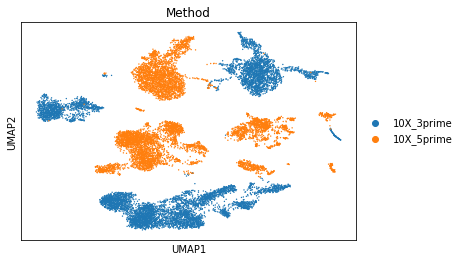

In [13]:
# you can use batch or method
# you get the same sckater plot, just different labels
#scanpy.pl.umap(umapAnndata, color=['batch'])
scanpy.pl.umap(umapAnndata, color=['Method'])